In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [59]:
reward_df = pd.read_csv("../learning_movies/{0}/reward_history.csv".format("mr_mario_himself_cnn"),
                           header=None,
                           names=["Episode", "Reward"])

In [60]:
reward_df.head()

,Episode,Reward
0,1,34.808566
1,2,210.773350
2,3,1871.004856
3,4,473.213492
4,5,132.379718


In [11]:
def plot_rewards(project_name, ax):
    reward_df = pd.read_csv("../learning_movies/{0}/reward_history.csv".format(project_name),
                           header=None,
                           names=["Episode", "Reward"])
    ax.plot(reward_df["Episode"], reward_df["Reward"])
    ax.set_xlabel("Episode")
    ax.set_ylabel("Reward")
    ax.set_xticks(np.arange(0, reward_df["Episode"].max(), 5))
    ax.set_yticks(np.arange(0, reward_df["Reward"].max(), 250))
    ax.set_title("Rewards per Episode For {0}".format(project_name))

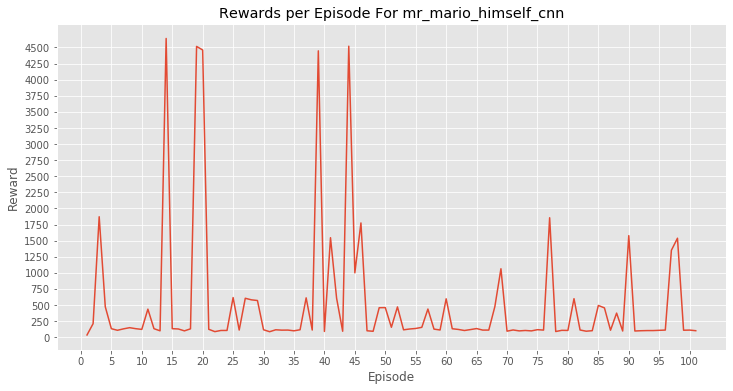

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))

plot_rewards("mr_mario_himself_cnn", ax)

In [23]:
def good_episodes(project_name, threshold=1000):
    reward_df = pd.read_csv("../learning_movies/{0}/reward_history.csv".format(project_name),
                           header=None,
                           names=["Episode", "Reward"])
    return reward_df[reward_df["Reward"] > threshold].set_index("Episode")

In [58]:
good_episodes("mr_mario_himself_cnn", 250)

,Reward
Episode,
3,1871.004856
4,473.213492
11,435.964814
14,4639.610094
19,4516.384699
20,4460.434671
25,615.560007
27,604.876868
28,580.672973


In [56]:
def prep_to_convert_all_good_episodes(project_name, threshold):
    to_be_converted = good_episodes(project_name, threshold).index
    full_options = '' 
    for idx, episode in enumerate(good_episodes(project_name, threshold).index):
        filepath = "learning_movies/{0}/SuperMarioWorld-Snes-Start-{1:06d}.bk2".format(project_name, episode)
        full_options += filepath
        full_options += " + "
        if idx % 3 == 2:
            print(full_options[:-3], '\n')
            full_options = ''
    return full_options[:-3]

In [57]:
prep_to_convert_all_good_episodes("mr_mario_himself_cnn", 250)

learning_movies/mr_mario_himself_cnn/SuperMarioWorld-Snes-Start-000003.bk2 + learning_movies/mr_mario_himself_cnn/SuperMarioWorld-Snes-Start-000004.bk2 + learning_movies/mr_mario_himself_cnn/SuperMarioWorld-Snes-Start-000011.bk2 

learning_movies/mr_mario_himself_cnn/SuperMarioWorld-Snes-Start-000014.bk2 + learning_movies/mr_mario_himself_cnn/SuperMarioWorld-Snes-Start-000019.bk2 + learning_movies/mr_mario_himself_cnn/SuperMarioWorld-Snes-Start-000020.bk2 

learning_movies/mr_mario_himself_cnn/SuperMarioWorld-Snes-Start-000025.bk2 + learning_movies/mr_mario_himself_cnn/SuperMarioWorld-Snes-Start-000027.bk2 + learning_movies/mr_mario_himself_cnn/SuperMarioWorld-Snes-Start-000028.bk2 

learning_movies/mr_mario_himself_cnn/SuperMarioWorld-Snes-Start-000029.bk2 + learning_movies/mr_mario_himself_cnn/SuperMarioWorld-Snes-Start-000037.bk2 + learning_movies/mr_mario_himself_cnn/SuperMarioWorld-Snes-Start-000039.bk2 

learning_movies/mr_mario_himself_cnn/SuperMarioWorld-Snes-Start-000041.bk2 +

'learning_movies/mr_mario_himself_cnn/SuperMarioWorld-Snes-Start-000097.bk2 + learning_movies/mr_mario_himself_cnn/SuperMarioWorld-Snes-Start-000098.bk2'